Model training#Train set

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
dataset_train = pd.read_csv('6269_train.csv', thousands=",")
dataset_train

,date,shares_traded,amount_traded,open,high,low,close,fluctuation,transction
0,105/01/04,2707539,213592981,79.2,79.8,78.0,78.5,-0.2,1976
1,105/01/05,7462452,575696567,78.6,78.9,76.2,76.2,-2.3,4704
2,105/01/06,12806455,924194275,75.0,75.0,70.2,72.2,-4.0,7759
3,105/01/07,8042471,567018339,71.0,72.3,69.0,70.3,-1.9,4780
4,105/01/08,8554617,595916707,67.9,71.4,66.5,71.0,0.7,5092
...,...,...,...,...,...,...,...,...,...
1419,110/10/25,1988519,184909421,93.2,93.7,92.2,93.2,0.3,1259
1420,110/10/26,2622364,247732997,94.1,95.6,93.7,94.1,0.9,1827
1421,110/10/27,3375792,321940477,94.1,96.2,93.7,95.7,1.6,2509
1422,110/10/28,13431728,1325449910,98.6,102.0,97.5,97.7,2.0,8112


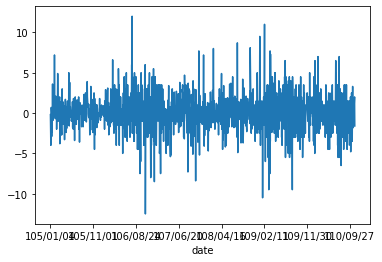

In [3]:
dataset_train.drop(['transction'], axis=1, inplace=True)
dataset_train.set_index(['date'], inplace=True)
dataset_train.fluctuation.plot()

In [4]:
from sklearn.preprocessing import MinMaxScaler

sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = pd.DataFrame(sc.fit_transform(dataset_train), columns=dataset_train.columns, index=dataset_train.index)
training_set_scaled

,shares_traded,amount_traded,open,high,low,close,fluctuation
date,,,,,,,
105/01/04,0.037547,0.026813,0.148410,0.141852,0.152644,0.147795,0.502041
105/01/05,0.118999,0.082337,0.141343,0.131301,0.131010,0.120381,0.416327
105/01/06,0.210543,0.135774,0.098940,0.085580,0.058894,0.072706,0.346939
105/01/07,0.128935,0.081006,0.051826,0.053927,0.044471,0.050060,0.432653
105/01/08,0.137708,0.085437,0.015312,0.043376,0.014423,0.058403,0.538776
...,...,...,...,...,...,...,...
110/10/25,0.025230,0.022415,0.313310,0.304807,0.323317,0.323004,0.522449
110/10/26,0.036088,0.032048,0.323910,0.327081,0.341346,0.333731,0.546939
110/10/27,0.048994,0.043427,0.323910,0.334115,0.341346,0.352801,0.575510


In [5]:
training_set_scaled.shape

(1424, 7)

In [6]:
n = 30
feature_names = list(training_set_scaled.drop('fluctuation', axis=1).columns)

x = []
y = []
indexes = []
training_set_scaled_x = training_set_scaled[feature_names]

for i in range(0, len(training_set_scaled)-n):
    x.append(training_set_scaled_x.iloc[i: i+n].values)
    y.append(training_set_scaled['fluctuation'].iloc[i+n-1])
    indexes.append(training_set_scaled.index[i+n-1])
x_train, y_train = np.array(x), np.array(y)


In [7]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

In [8]:
model = Sequential()

model.add(LSTM(50, activation='sigmoid', return_sequences=False, input_shape = (x_train.shape[1], x_train.shape[2])))
model.add(Dense(1))

In [9]:
model.compile(optimizer='adam', loss='mse', metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=200, batch_size=32)

Epoch 1/200
44/44 [==============================] - 2s 10ms/step - loss: 0.3373 - accuracy: 0.0014
Epoch 2/200
44/44 [==============================] - 0s 9ms/step - loss: 0.0109 - accuracy: 7.1736e-04
Epoch 3/200
44/44 [==============================] - 0s 11ms/step - loss: 0.0098 - accuracy: 7.1736e-04
Epoch 4/200
44/44 [==============================] - 0s 10ms/step - loss: 0.0096 - accuracy: 7.1736e-04
Epoch 5/200
44/44 [==============================] - 0s 9ms/step - loss: 0.0094 - accuracy: 7.1736e-04
Epoch 6/200
44/44 [==============================] - 0s 9ms/step - loss: 0.0093 - accuracy: 7.1736e-04
Epoch 7/200
44/44 [==============================] - 0s 9ms/step - loss: 0.0091 - accuracy: 7.1736e-04
Epoch 8/200
44/44 [==============================] - 0s 10ms/step - loss: 0.0091 - accuracy: 7.1736e-04
Epoch 9/200
44/44 [==============================] - 0s 9ms/step - loss: 0.0090 - accuracy: 7.1736e-04
Epoch 10/200
44/44 [==============================] - 0s 10ms/step - loss

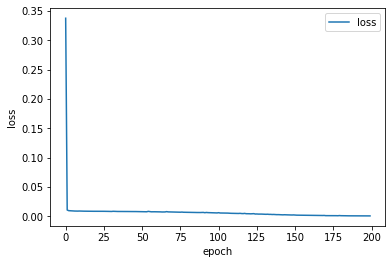

In [19]:
plt.plot(history.history["loss"], label = 'loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.show()

Prediction#Test set

In [11]:
dataset_test = pd.read_csv('6269_test.csv', thousands=",")
dataset_test.head(5)

,date,shares_traded,amount_traded,open,high,low,close,fluctuation,transction
0,110/11/01,2695799,260312853,97.3,97.3,96.1,96.3,0.2,2222
1,110/11/02,5071910,481275777,96.5,96.6,94.0,94.1,-2.2,4050
2,110/11/03,2230792,210953505,94.6,95.4,94.1,94.9,0.8,1936
3,110/11/04,4468483,434418916,95.6,98.0,95.5,97.7,2.8,3692
4,110/11/05,2554103,249177624,97.9,98.3,96.7,98.0,0.3,2132


In [12]:
dataset_test.drop(['transction'], axis=1, inplace=True)
dataset_test.set_index(['date'], inplace=True)
dataset_test.head(5)

,shares_traded,amount_traded,open,high,low,close,fluctuation
date,,,,,,,
110/11/01,2695799,260312853,97.3,97.3,96.1,96.3,0.2
110/11/02,5071910,481275777,96.5,96.6,94.0,94.1,-2.2
110/11/03,2230792,210953505,94.6,95.4,94.1,94.9,0.8
110/11/04,4468483,434418916,95.6,98.0,95.5,97.7,2.8
110/11/05,2554103,249177624,97.9,98.3,96.7,98.0,0.3


In [13]:
x_test = dataset_test.drop(['fluctuation'], axis = 1)
y_test = dataset_test.iloc[0:, 6:7]
x_test_scaled = pd.DataFrame(sc.fit_transform(x_test), columns=dataset_test.columns[:6], index=dataset_test.index)
y_test_scaled = pd.DataFrame(sc.fit_transform(y_test), columns=dataset_test.columns[6:], index=dataset_test.index)

In [14]:
xt = []
yt = []
for i in range(0, len(dataset_test)-n):
    xt.append(x_test_scaled.iloc[i: i+n].values)
    yt.append(y_test_scaled['fluctuation'].iloc[i+n-1])
x_test = np.array(xt)
y_test = np.array(yt)

In [16]:
predict = model.predict(x_test)
predict = pd.DataFrame(predict).rename(columns={0: 'Predicted Fluctuation'})
actual = pd.DataFrame(yt).rename(columns={0: 'Actual Fluctuation'})

In [17]:
prediction = pd.DataFrame(sc.inverse_transform(predict), columns=dataset_test.columns[6:], index=dataset_test.index[n:])
real = pd.DataFrame(sc.fit_transform(actual), columns=dataset_test.columns[6:], index=dataset_test.index[n:])

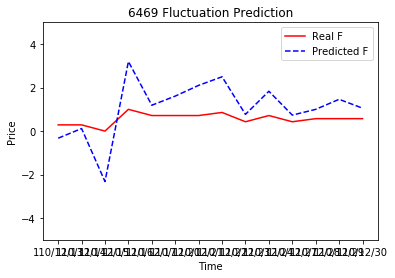

In [20]:
plt.plot(real, color = 'red', label = 'Real F')
plt.plot(prediction, color = 'blue', label = 'Predicted F', linestyle = '--') 
plt.title('6469 Fluctuation Prediction')
plt.xlabel('Time')
plt.ylabel('Price')
plt.ylim(-5, 5)
plt.legend()
plt.show()